In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
import tools

In [3]:
data = pd.read_json('data/flink/pr-flat_20220602-13h35m41s_apache_flink_master_prs-brief.txt', lines=True)

In [4]:
data = tools.create_label_dataset(data)
tools.initialize_datetime(data)
data['lifetime'] = tools.add_lifetime_column(data)
data = data.set_index('createdAt')

In [5]:
data['_count'] = 1
data = data[['name', 'number', 'lifetime', '_count']]
data

,name,number,lifetime,_count
createdAt,,,,
2014-06-10 16:51:08+00:00,component=Deployment/YARN,1,0 days 02:51:06,1
2014-06-10 22:31:31+00:00,component=Runtime/Network,5,6 days 23:47:47,1
2014-06-11 10:16:58+00:00,component=<none>,6,6 days 12:02:20,1
2014-06-12 09:00:26+00:00,component=<none>,8,1 days 06:37:45,1
2014-06-12 14:23:29+00:00,component=<none>,11,0 days 07:03:46,1
...,...,...,...,...
2022-06-01 08:12:33+00:00,component=TableSQL/Planner,19860,NaT,1
2022-06-01 10:34:44+00:00,component=Deployment/YARN,19863,NaT,1
2022-06-01 12:47:53+00:00,component=Runtime/Checkpointing,19864,NaT,1


In [6]:
for el in data['name'].unique():
    if not el.startswith('component='):
        print(el)

post-ui-rework
review=description?
review=consensus?
review=approved ✅
review=architecture?
review=quality?
dependencies
ruby
java
post-1.10-scheduler-feedback
javascript


In [7]:
key_none = '<none>'  # A component name used by the api
key_undefined = '<undefined>'  # introduced by us
data['component'] = key_undefined
data['other'] = key_undefined
data.loc[~data['name'].str.startswith('component='), 'other'] = data.loc[~data['name'].str.startswith('component='), 'name'] 
data.loc[data['name'].str.startswith('component='), 'component'] = data.loc[data['name'].str.startswith('component='), 'name'].str.replace('component=', '') 

TypeError: savefig() missing 1 required positional argument: 'fname'

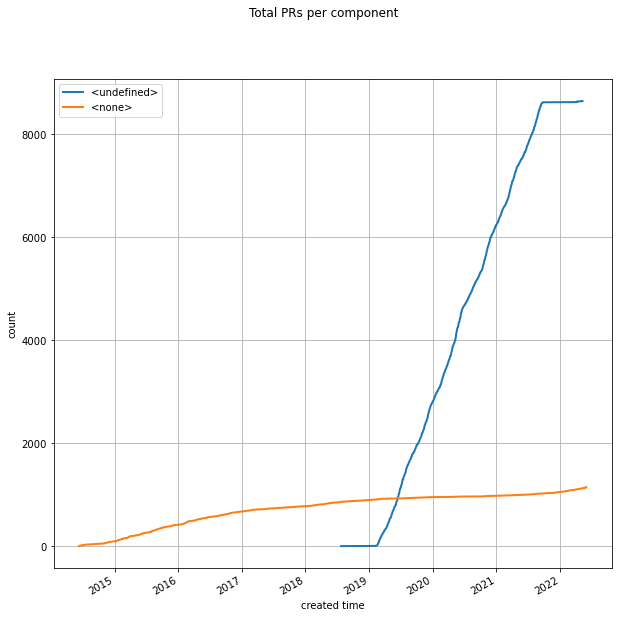

In [8]:
undefined_components = ['<undefined>', '<none>']
f, ax = plt.subplots(figsize=(10, 10))
for component in undefined_components:
    data.loc[data['component'] == component, '_count'].cumsum().plot(ax=ax, label=component, lw=2)
ax.legend()
f.suptitle('Total PRs per component')
ax.set(xlabel='created time', ylabel='count')
ax.grid()
tools.savefig('prs_undefined_none_labels')

In [ ]:
data.loc[data['component'] != '<undefined>'].groupby(pd.Grouper(freq='Y'))['component'].apply(lambda x: x.value_counts().head(5))